In [ ]:
2. Data Analysis 
    
    A. How does the number of individual Robinhood accounts holding a given security affect the strike price of the underlying? How does this affect implied volatility?

    B. What is the correlation between price and volatility? For which stocks does the effect of Robinhood popularity have the greatest impact, and what insights do this offer on Robinhood's user base?

In [ ]:
# Initial imports
import os
import pandas as pd

from MCForecastTools import MCSimulation

%matplotlib inline



In [4]:
from pathlib import Path
import numpy as np

In [206]:
# Variables / Input Data
filepath = Path("../data/cleandata/Robintrack_Data/ABB_csv_clean.csv")

df_robin_data = get_data_robintrack(filepath)

# transform column str 'timestamp' into timestamp
df_robin_data['timestamp'] = pd.to_datetime(df_robin_data['timestamp'])

## resample groupying by day 
df_robin_data = df_robin_data.resample('D', on='timestamp').mean()

df_robin_data.head()


,users_holding
timestamp,
2020-01-01,2149.000000
2020-01-02,2145.958333
2020-01-03,2141.666667
2020-01-04,2147.000000
2020-01-05,2147.000000


In [211]:
df_robin_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 223 entries, 2020-01-01 to 2020-08-10
Freq: D
Data columns (total 1 columns):
users_holding    223 non-null float64
dtypes: float64(1)
memory usage: 3.5 KB


In [210]:
#df_robin_data[np.isnan(df_robin_data)]=2147.00
df_robin_data['users_holding'] = df_robin_data['users_holding'].fillna(2147.00)
df_robin_data.head()

,users_holding
timestamp,
2020-01-01,2149.000000
2020-01-02,2145.958333
2020-01-03,2141.666667
2020-01-04,2147.000000
2020-01-05,2147.000000


In [212]:
df_robin_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 223 entries, 2020-01-01 to 2020-08-10
Freq: D
Data columns (total 1 columns):
users_holding    223 non-null float64
dtypes: float64(1)
memory usage: 3.5 KB


In [169]:
import requests
import json
import alpaca_trade_api as tradeapi
from dotenv import load_dotenv

In [173]:
# Load .env enviroment variables
load_dotenv()

True

In [174]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("GGC_ALPACA_API_KEY")
alpaca_secret_key = os.getenv("GGC_ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [214]:
# Format current date as ISO format
start_date = pd.Timestamp("2020-01-01", tz="America/New_York").isoformat()
#start_date = pd.Timestamp.today(tz="America/New_York").isoformat()[0:10]    #[0:10] only date

end_date = pd.Timestamp("2020-08-10", tz="America/New_York").isoformat()
#end_date = pd.Timestamp.today(tz="America/New_York").isoformat()[0:10]      #[0:10] only date

# Set the tickers
tickers = ["ABB", "TSLA", "AMD", "RIOT"]

# Set timeframe to '1D' 
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_tickers = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Preview DataFrame
df_tickers.head()


ABB                                   AMD         \
                            open    high    low  close   volume   open   high   
time                                                                            
2020-01-02 00:00:00-05:00  24.32  24.380  24.26  24.37  1253586  46.86  49.25   
2020-01-03 00:00:00-05:00  24.05  24.235  24.05  24.17  1317223  48.03  49.39   
2020-01-06 00:00:00-05:00  24.12  24.360  24.11  24.32  1701977  48.02  48.86   
2020-01-07 00:00:00-05:00  24.23  24.300  24.14  24.28  1133708  49.35  49.39   
2020-01-08 00:00:00-05:00  24.22  24.450  24.22  24.36  1296416  47.85  48.30   

                                                   RIOT                     \
                             low  close    volume  open  high   low  close   
time                                                                         
2020-01-02 00:00:00-05:00  46.63  49.11  77354773  1.14  1.23  1.13  1.217   
2020-01-03 00:00:00-05:00  47.54  48.57  70131747  1.22  1.22  1.14  1.190   
2020-01-06 00:00:00-05:00  47.86  48.39  43344539  1.23  1.30  1.20  1.290   
2020-01-07 00:00:00-05:00  48.04  48.24  53833107  1.39  1.50  1.33  1.485   
2020-01-08 00:00:00-05:00  47.14  47.84  51859353  1.54  1.54  1.29  1.350   

                                      TSLA                               \
                            volume    open      high      low     close   
time                                                                      
2020-01-02 00:00:00-05:00   900844  424.95  430.6957  421.710  430.2400   
2020-01-03 00:00:00-05:00   459030  440.50  454.0000  436.920  442.7500   
2020-01-06 00:00:00-05:00   988813  440.47  451.5600  440.000  451.4001   
2020-01-07 00:00:00-05:00  3156053  461.40  471.6300  453.355  469.1700   
2020-01-08 00:00:00-05:00  1739923  473.70  498.4900  468.230  492.0900   

                                     
                             volume  
time                                 
2020-01-02 00:00:00-05:00   9113793  
2020-01-03 00:00:00-05:00  16409329  
2020-01-06 00:00:00-05:00   9807049  
2020-01-07 00:00:00-05:00  16859537  
2020-01-08 00:00:00-05:00  29804104

In [215]:
# Count nulls
df_tickers.isnull().sum()

ABB   open      0
      high      0
      low       0
      close     0
      volume    0
AMD   open      0
      high      0
      low       0
      close     0
      volume    0
RIOT  open      0
      high      0
      low       0
      close     0
      volume    0
TSLA  open      0
      high      0
      low       0
      close     0
      volume    0
dtype: int64

In [216]:
# Create and empty DataFrame for closing prices
df_tickers_closing_prices = pd.DataFrame()

# Fetch the closing prices 
df_tickers_closing_prices["ABB"] = df_tickers["ABB"]["close"]
#df_tickers_closing_prices["TSLA"] = df_tickers["TSLA"]["close"]
#df_tickers_closing_prices["AMD"] = df_tickers["AMD"]["close"]
#df_tickers_closing_prices["RIOT"] = df_tickers["RIOT"]["close"]

# Drop the time component of the date
df_tickers_closing_prices.index = df_tickers_closing_prices.index.date

# Compute daily returns
#df_daily_returns = df_closing_prices.pct_change().dropna()

# Display sample data
#df_daily_returns.head(10)

df_tickers_closing_prices.head()

,ABB
2020-01-02,24.37
2020-01-03,24.17
2020-01-06,24.32
2020-01-07,24.28
2020-01-08,24.36


In [217]:
# Concatenate the two DataFrames by columns and perform an inner join
concat_robin_ticker = pd.concat([df_tickers_closing_prices, df_robin_data], axis="columns", join="inner")
concat_robin_ticker

,ABB,users_holding
2020-01-02,24.370,2145.958333
2020-01-03,24.170,2141.666667
2020-01-06,24.320,2147.000000
2020-01-07,24.280,2147.000000
2020-01-08,24.360,2147.000000
...,...,...
2020-08-04,25.630,3601.708333
2020-08-05,25.950,3597.041667
2020-08-06,26.025,3592.083333
2020-08-07,25.985,3591.041667


In [219]:
concat_robin_ticker.isnull().sum()

ABB              0
users_holding    0
dtype: int64

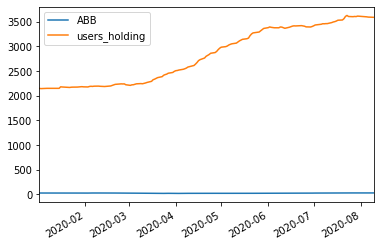

In [220]:
# Plot the data trends of the two variables over time
concat_robin_ticker.plot()

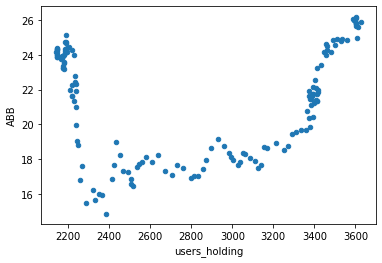

In [222]:
# Plot the relationship between the two variables
concat_robin_ticker.plot(kind='scatter', x='users_holding', y='ABB')

In [223]:
# Calculate the correlation 
correl_robin_ticker = concat_robin_ticker.corr()

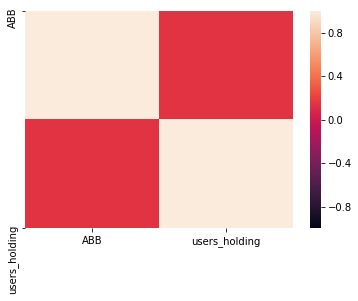

In [225]:
# `heatmap` from the seaborn library to visualize correlations
import seaborn as sns
sns.heatmap(correl_robin_ticker, vmin=-1, vmax=1)

In [226]:
# calculate the daily returns 
daily_ret_robin_ticker = concat_robin_ticker.pct_change()

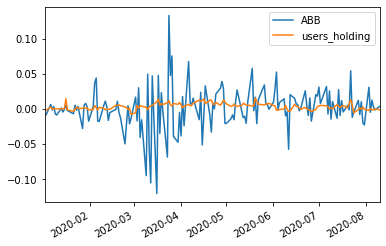

In [227]:
# Plot the daily returns 
daily_ret_robin_ticker.plot()

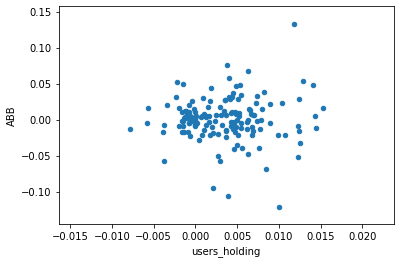

In [229]:
# Plot the relationship between the two 
daily_ret_robin_ticker.plot(kind='scatter', x='users_holding', y='ABB')

In [230]:
correl_daily_ret_robin_ticker = daily_ret_robin_ticker.corr()
correl_daily_ret_robin_ticker

,ABB,users_holding
ABB,1.000000,0.029119
users_holding,0.029119,1.000000


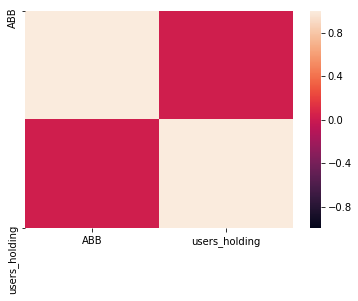

In [231]:
# `heatmap` correlation daily returns 
sns.heatmap(correl_daily_ret_robin_ticker, vmin=-1, vmax=1)

In [ ]:
#### Functions 

# The total number of months included in the dataset 
def get_data_robintrack(filepath):
    with open(filepath, "r") as csvfile:            
        my_csvreader = csv.reader(csvfile)
        next(my_csvreader)                          #remove the column headers in cvs

        nr_months = len(list(my_csvreader))         #not including headers 
        str_nr_months = f"Total Months: {nr_months}"

    return str_nr_months

In [ ]:
# Variables / Input Data
filepath = Path("../data/Robintrack_Data/ABB.csv")
filepath_text = Path("../resources/results.txt")
list_of_functions = [f_nr_months, f_t_profit_losses, f_avg_change, f_greatest_increase, f_greatest_decrease]
list_of_results = []


for function in list_of_functions:
    result_func = function(filepath)
    print(result_func)
    list_of_results.append(result_func)

f_export_text_file (filepath_text, list_of_results)